In [ ]:
!pip install easyocr #easyocr 다운

import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

reader = easyocr.Reader(['ko', 'en']) #한글과 영어를 읽기위한 다운

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 29.6 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

--2023-11-21 04:38:34--  https://image.yes24.com/goods/68145670/XL
Resolving image.yes24.com (image.yes24.com)... 183.111.246.138, 183.111.246.130, 183.111.246.137
Connecting to image.yes24.com (image.yes24.com)|183.111.246.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114289 (112K) [image/jpeg]
Saving to: ‘electromagnetics.jpg’

electromagnetics.jp 100%[===================>] 111.61K   199KB/s    in 0.6s    

2023-11-21 04:38:36 (199 KB/s) - ‘electromagnetics.jpg’ saved [114289/114289]



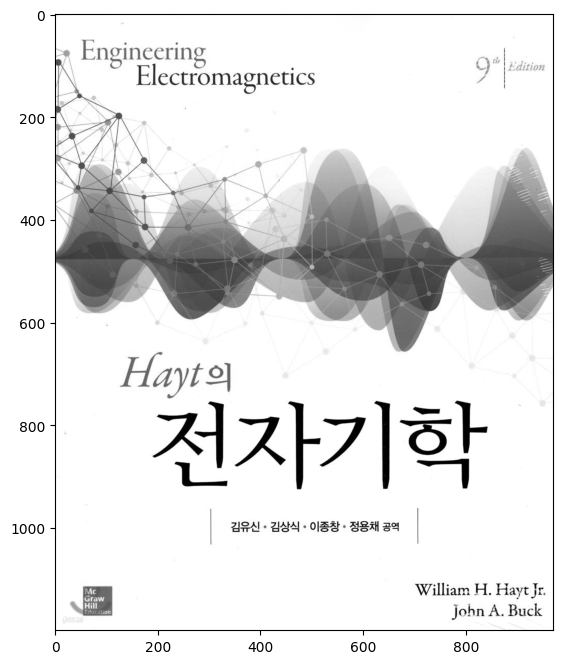

In [ ]:
!wget https://image.yes24.com/goods/68145670/XL -O electromagnetics.jpg #이미지 주소로 이미지 다운하여 저장
img_ori = cv2.imread('electromagnetics.jpg')

height, width, channel = img_ori.shape

#그레이스케일링
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY) #이미지 흑백변환
plt.figure(figsize=(8, 8)) #출력 사이즈
plt.imshow(gray, cmap='gray')

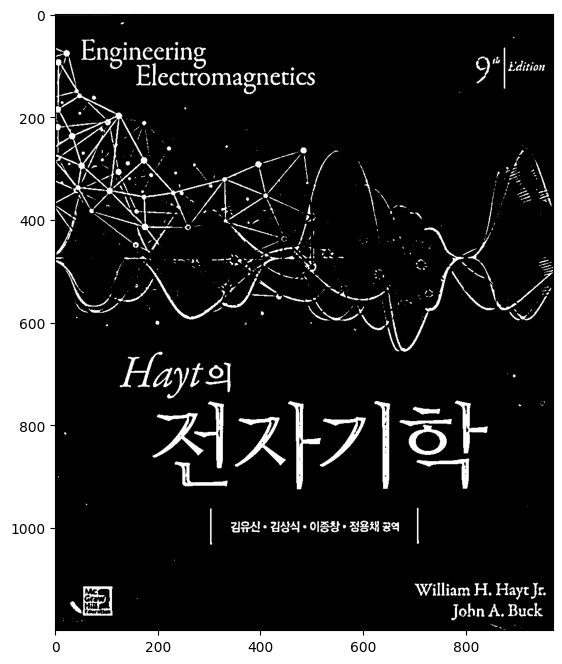

In [ ]:
#임계 처리(Thresholding)를 통한 이진화
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0) #가우시안 블러링

img_thresh = cv2.adaptiveThreshold( #임계 처리를 통한 이진화
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)

plt.figure(figsize=(8, 8))
plt.imshow(img_thresh, cmap='gray')

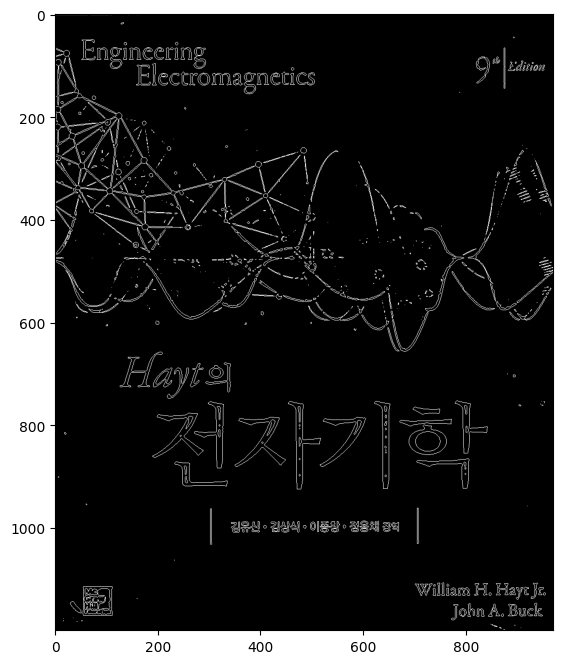

In [ ]:
#곡선, 윤곽(Contours) 찾기
contours, _ = cv2.findContours(
    img_thresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

plt.figure(figsize=(8, 8))
plt.imshow(temp_result)

In [ ]:
THRESHOLD = 0.9 #정확도 기준값

reader = easyocr.Reader(['ko', 'en'])

def read(img_path, ori_img): #변형이미지와 원본 이미지를 인수로 가져옴
    #img = cv2.imread(img_path)  #이미지 읽기
    output_path = '/content/output_image.png'  # 저장 경로 설정
    plt.imsave(output_path, img_path)
    result = reader.readtext(output_path) #문자 읽기. 여러 글자들이 읽혀짐

    word = []

    for bbox, text, conf in result: #문자의 4개 꼭짓점 좌표, 문자, 정확도
        if conf > THRESHOLD:#정확도가 기준값을 넘으면
            word.append(text) #word에 문자 저장
            cv2.rectangle(ori_img, pt1=(int(bbox[0][0]), int(bbox[0][1])), pt2=(int(bbox[2][0]), int(bbox[2][1])), color=(0, 255, 0), thickness=3)
                                                 #문자 박스치기

    print(word) #문자 출력
    print(" ")
    plt.figure(figsize=(8, 8))
    plt.imshow(ori_img[:, :, ::-1]) #BGR을 RGB로 바꾼다. (BGR은 opencv 디폴트값이고 matplotlib에서 RGB사용)
    plt.axis('off') #x,y 축 제거
    plt.show()

['Enginscring', 'Hayt의', '전자기학', '김유신', 'Hill']
 


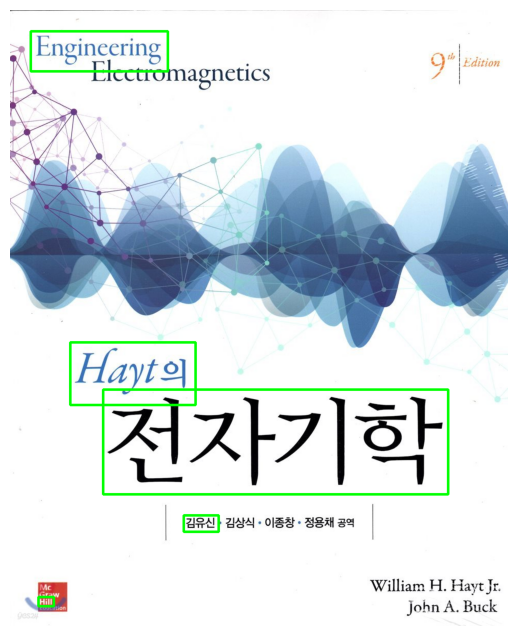

In [ ]:
read(gray, img_ori)